In [1]:
%%capture
%run load_dataset_and_build_tokenizer.ipynb import get_batched_examples

In [33]:
# Take sample of data
import numpy as np

sample_batch_size=128
sample_num_iters=100
sample_n = sample_batch_size * sample_num_iters
seq_len=50
x_lens = []
y_lens = []

def count_toks(x):
    return np.sum(np.array(x) != 0)
for i, (x, y) in tqdm(enumerate(itertools.islice(get_batched_examples(sample_batch_size, seq_len), sample_num_iters))):
    for x_row, y_row in zip(x, y):
        x_lens.append(count_toks(x_row))
        y_lens.append(count_toks(y_row))
print(f'totals: x {sum(x_lens)} y {sum(y_lens)}')
print(f'avgs per batch: x {sum(x_lens)/sample_num_iters} y {sum(y_lens)/sample_num_iters}')
print(f'avgs per datapoint: x {sum(x_lens)/len(x_lens)} y {sum(y_lens)/len(y_lens)}')

100it [00:43,  2.27it/s]

totals: x 374707 y 379876
avgs per batch: x 3747.07 y 3798.76
avgs per datapoint: x 29.273984375 y 29.6778125


In [32]:
print(f'Smaller than 50 (out of {len(x_lens)}): x {sum([x_len<50 for x_len in x_lens])} y {sum([y_len<50 for y_len in y_lens])}')

Smaller than 50 (out of 6400): x 5285 y 5200


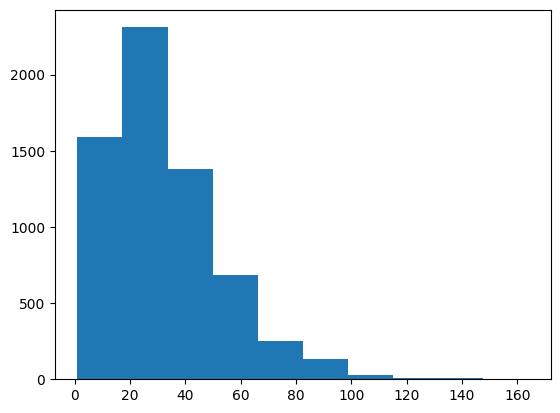

In [26]:
import matplotlib.pyplot as plt
plt.hist(x_lens)
plt.show() 

In [2]:
for i, (x, y) in tqdm(enumerate(itertools.islice(get_batched_examples(32, 50), 10))):
    continue

10it [00:00, 10.25it/s]


In [3]:
for i, (x, y) in tqdm(enumerate(itertools.islice(get_batched_examples(320, 50), 1))):
    continue

1it [00:01,  1.21s/it]


In [ ]:
# Find max len helper
from tokenized_dataset import load_tokenized_dataset, get_batched_examples, get_batched_examples_per_length, get_batched_examples_packed
ds, (tokenizer, detokenize, tokenizer_vocab_size) = load_tokenized_dataset()
ds = ds.shuffle(seed=42) # TODO XXX: put it in better place? does it mess up with resume_from_checkpoint logic?

#train_lens_x = [len(item['x']) for item in ds["train"]]
#train_lens_y = [len(item['y']) for item in ds["train"]]
val_lens_x = [len(item['x']) for item in ds["validation"]]
val_lens_y = [len(item['y']) for item in ds["validation"]]
len([len_x for len_x in lens_x if len_x>94])
